# Machine Learning with Python Classification Project
Using the credit card dataset on QMplus, this notebook will analyse the data and build a binary classification model

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
cc_df = pd.read_csv('./credit_card_dataset.csv')

## Exploratory Analysis

In [4]:
cc_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Rejected
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,5008865,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,Laborers,4,0
2,5008889,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,Core staff,1,0
3,5009000,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9927.0,-828,Drivers,2,0
4,5009023,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,-15444.0,-3112,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5150038,M,N,N,0,180000.0,Working,Secondary / secondary special,Single / not married,With parents,-12784.0,-1537,Drivers,1,0
1544,5150047,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958.0,-655,Sales staff,2,0
1545,5150164,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,Municipal apartment,-23643.0,365243,NaN,1,0
1546,5150221,M,Y,Y,0,116100.0,Working,Secondary / secondary special,Married,House / apartment,-10136.0,-2441,Laborers,2,0


In [5]:
cc_df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,Rejected
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,15.000000,1.000000


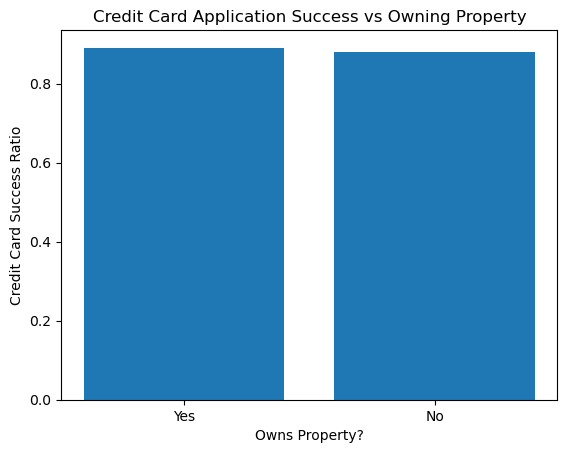

In [6]:
owns_prop = cc_df[cc_df['Propert_Owner']=='Y']['Rejected']
no_prop = cc_df[cc_df['Propert_Owner']=='N']['Rejected']

plt.bar(['Yes','No'],[owns_prop.value_counts()[0]/owns_prop.count(),no_prop.value_counts()[0]/no_prop.count()])
plt.title('Credit Card Application Success vs Owning Property')
plt.xlabel('Owns Property?')
plt.ylabel('Credit Card Success Ratio')
plt.show()


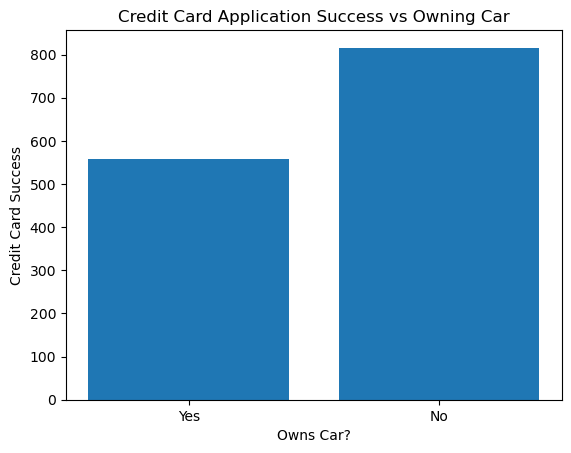

In [7]:
owns_car = cc_df[cc_df['Car_Owner']=='Y']['Rejected']
no_car = cc_df[cc_df['Car_Owner']=='N']['Rejected']

plt.bar(['Yes','No'],[owns_car.value_counts()[0],no_car.value_counts()[0]])
plt.title('Credit Card Application Success vs Owning Car')
plt.xlabel('Owns Car?')
plt.ylabel('Credit Card Success')
plt.show()

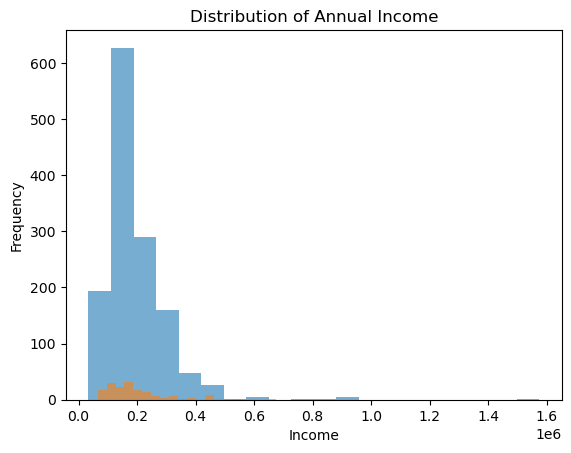

In [8]:
plt.hist(cc_df[cc_df['Rejected']==0]['Annual_income'], bins=20, alpha = 0.6, label='Accepted')
plt.hist(cc_df[cc_df['Rejected']==1]['Annual_income'], bins=20, alpha = 0.6, label='Rejected')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title("Distribution of Annual Income")
plt.show()

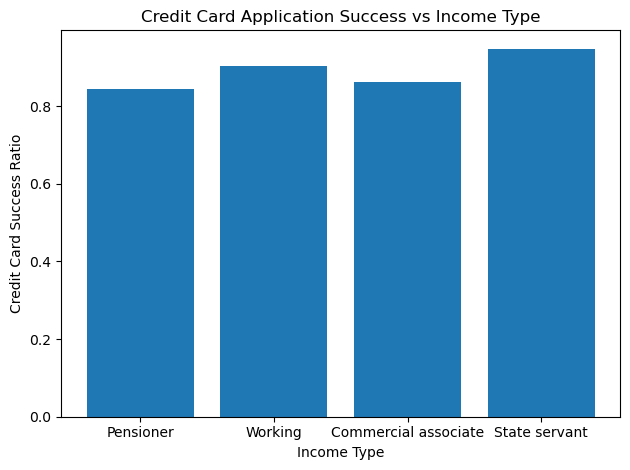

In [9]:
incometypes = cc_df['Type_Income'].unique()
rejected = [cc_df[cc_df['Type_Income']== itype]['Rejected'] for itype in incometypes]
ratio_of_accept = [itype.value_counts()[0]/len(itype) for itype in rejected]

plt.bar(incometypes,ratio_of_accept)
plt.title('Credit Card Application Success vs Income Type')
plt.xlabel('Income Type')
plt.ylabel('Credit Card Success Ratio')
plt.tight_layout()
plt.show()


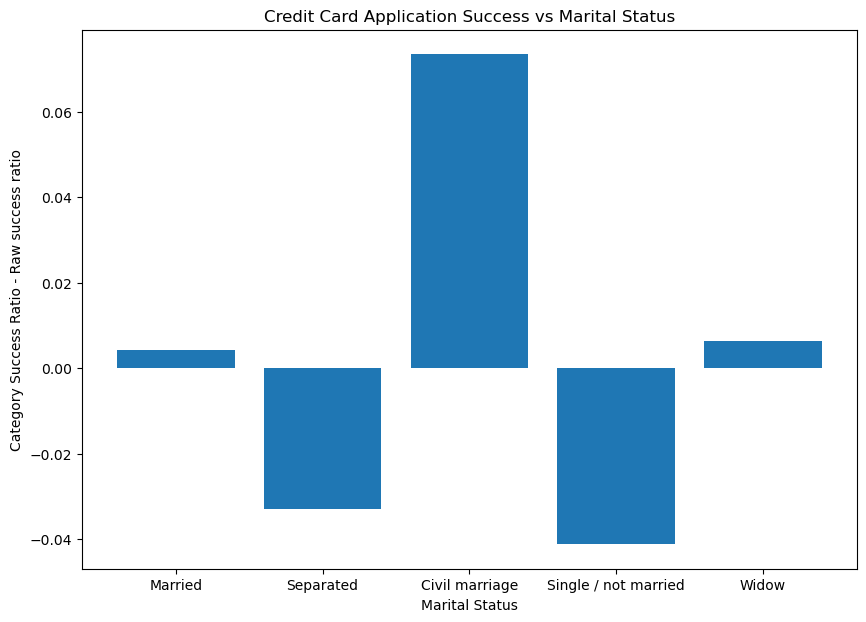

In [10]:
raw_accept_ratio = cc_df['Rejected'].value_counts()[0]/len(cc_df['Rejected'])
maritaltypes = cc_df['Marital_status'].unique()
rejected = [cc_df[cc_df['Marital_status']== mtype]['Rejected'] for mtype in maritaltypes]
ratio_of_accept = [mtype.value_counts()[0]/len(mtype)-raw_accept_ratio for mtype in rejected]

plt.figure(figsize=(10,7))
plt.bar(maritaltypes,ratio_of_accept)
plt.title('Credit Card Application Success vs Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Category Success Ratio - Raw success ratio')

plt.show()

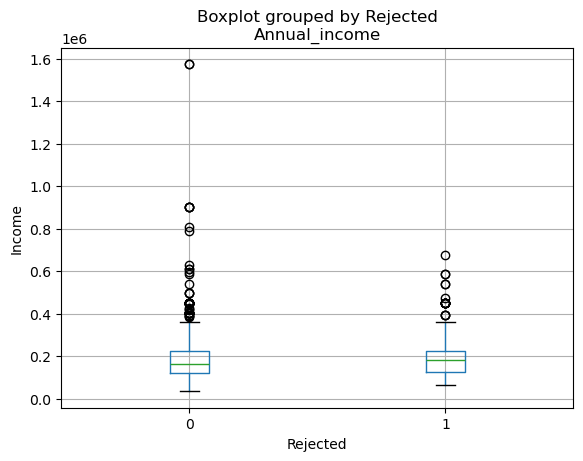

In [11]:
cc_df.boxplot(column='Annual_income',by='Rejected')
plt.ylabel('Income')
plt.show()

In [12]:
pensioners_df = cc_df[cc_df['Employed_days']>0]
pensioners_df['Type_Income'].unique()
workers_df = cc_df[cc_df['Employed_days']<0]

In [13]:
cc_df[cc_df['Type_Occupation'].isnull()]

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Rejected
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
4,5009023,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,-15444.0,-3112,NaN,4,0
7,5009118,F,N,N,0,157500.0,Commercial associate,Higher education,Separated,With parents,-15737.0,-432,NaN,1,0
14,5009319,F,Y,N,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20140.0,365243,NaN,2,0
15,5009443,F,N,N,0,90000.0,State servant,Secondary / secondary special,Married,House / apartment,-9489.0,-1682,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,5149484,F,Y,Y,1,135000.0,Commercial associate,Higher education,Married,House / apartment,-11278.0,-2481,NaN,3,0
1532,5149647,F,N,Y,0,292500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22576.0,365243,NaN,1,0
1536,5149805,F,N,Y,0,135000.0,State servant,Incomplete higher,Single / not married,With parents,-9873.0,-2086,NaN,1,0
1545,5150164,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,Municipal apartment,-23643.0,365243,NaN,1,0


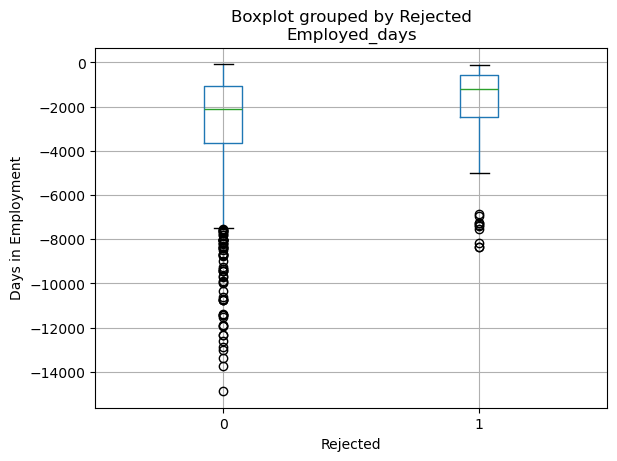

In [14]:
workers_df.boxplot(column='Employed_days',by='Rejected')
plt.ylabel('Days in Employment')
plt.show()

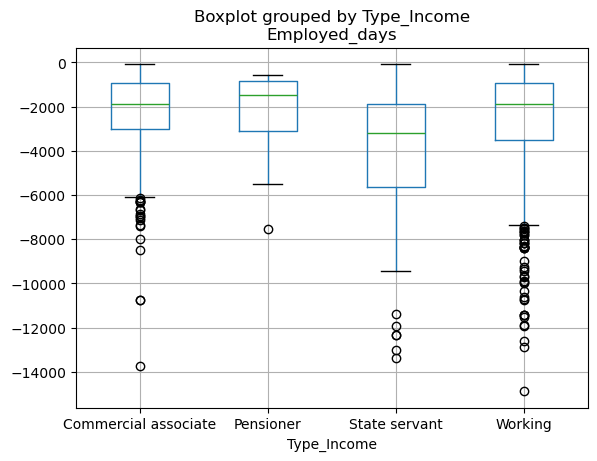

In [15]:
workers_df.boxplot(column='Employed_days',by='Type_Income')
plt.show()

In [16]:
workers_df[workers_df['Type_Income']=='Pensioner']

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Rejected
27,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
67,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,Core staff,3,1
82,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,-8907.0,-913,NaN,3,1
101,5021998,M,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18863.0,-1644,NaN,2,1
421,5046328,F,N,Y,1,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-15466.0,-2269,Low-skill Laborers,3,1
1203,5116906,M,Y,Y,0,211500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-15047.0,-7553,Core staff,2,1
1296,5125816,F,Y,N,0,450000.0,Pensioner,Higher education,Married,House / apartment,-19783.0,-5521,Managers,2,0
1539,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387.0,-1325,Medicine staff,2,1


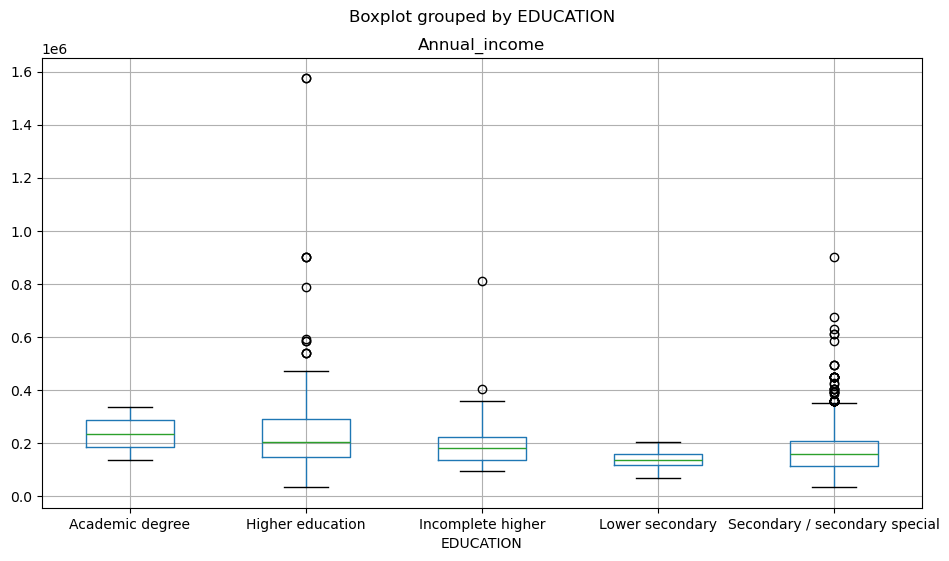

In [17]:
cc_df.boxplot(column='Annual_income',by='EDUCATION', figsize=(11,6))

plt.show()

In [18]:
# Dictionary showing number of unique values per feature
nunique_values = {col: cc_df[col].nunique() for col in cc_df.columns}
print(nunique_values)

{'Ind_ID': 1548, 'GENDER': 2, 'Car_Owner': 2, 'Propert_Owner': 2, 'CHILDREN': 6, 'Annual_income': 115, 'Type_Income': 4, 'EDUCATION': 5, 'Marital_status': 5, 'Housing_type': 6, 'Birthday_count': 1270, 'Employed_days': 956, 'Type_Occupation': 18, 'Family_Members': 7, 'Rejected': 2}


In [19]:
# Dictionary for column categories
categorical_cols = cc_df.columns.drop(['Ind_ID','Annual_income','Birthday_count','Employed_days','Rejected'])
unique_values = {col: cc_df[col].unique() for col in categorical_cols}
print(unique_values)

{'GENDER': array(['M', 'F', nan], dtype=object), 'Car_Owner': array(['Y', 'N'], dtype=object), 'Propert_Owner': array(['Y', 'N'], dtype=object), 'CHILDREN': array([ 0,  2,  1,  3, 14,  4]), 'Type_Income': array(['Pensioner', 'Working', 'Commercial associate', 'State servant'],
      dtype=object), 'EDUCATION': array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object), 'Marital_status': array(['Married', 'Separated', 'Civil marriage', 'Single / not married',
       'Widow'], dtype=object), 'Housing_type': array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object), 'Type_Occupation': array([nan, 'Laborers', 'Core staff', 'Drivers', 'Managers',
       'Accountants', 'Cleaning staff', 'Sales staff', 'Cooking staff',
       'Security staff', 'Medicine staff', 'Secretaries',
       'High skill tech staff', 'HR 

## Processing

In [20]:
missing_val_columns = []
for col in cc_df.columns:
    nulls = cc_df[col].isnull().sum()
    if nulls>0:
        missing_val_columns.append(col)
    print("number of NaN values in", col, nulls)

number of NaN values in Ind_ID 0
number of NaN values in GENDER 7
number of NaN values in Car_Owner 0
number of NaN values in Propert_Owner 0
number of NaN values in CHILDREN 0
number of NaN values in Annual_income 23
number of NaN values in Type_Income 0
number of NaN values in EDUCATION 0
number of NaN values in Marital_status 0
number of NaN values in Housing_type 0
number of NaN values in Birthday_count 22
number of NaN values in Employed_days 0
number of NaN values in Type_Occupation 488
number of NaN values in Family_Members 0
number of NaN values in Rejected 0


In [21]:
# GENDER MISSING VALUES
import random
# Identify rows with missing Gender values
missing_gender = cc_df['GENDER'].isnull()

# Count the number of missing Gender values
num_missing = missing_gender.sum()

# Randomly assign "M" or "F" to missing Gender values
random_gender = [random.choice(["M", "F"]) for _ in range(num_missing)]

# Update the DataFrame with the randomly assigned values
cc_df.loc[missing_gender, 'GENDER'] = random_gender

# Display the updated DataFrame
print("Now there are this many missing gender vals:",cc_df['GENDER'].isnull().sum())

missing_val_columns.remove('GENDER')


Now there are this many missing gender vals: 0


In [22]:
retired_pensioners = cc_df['Employed_days']>0

cc_df.loc[retired_pensioners, 'Type_Occupation'] = 'Retired'

# Display the updated DataFrame
print("Now there are this many missing occupation type vals:",cc_df['Type_Occupation'].isnull().sum())

Now there are this many missing occupation type vals: 227


In [23]:
print("The columns with missing values are:", missing_val_columns)
filling_dictionary = {'Annual_income':cc_df['Annual_income'].median(), 'Birthday_count':cc_df['Birthday_count'].median(), 'Type_Occupation':cc_df['Type_Occupation'].mode()[0]}
print("Will replace values with ", filling_dictionary)
noNaN_df = cc_df.fillna(filling_dictionary)
noNaN_df['Birthday_count'] =  np.round(noNaN_df['Birthday_count']/(-365),0)
noNaN_df['Employed_days'] =  np.round(noNaN_df['Employed_days']/(-365),1)
noNaN_df.drop_duplicates(subset=noNaN_df.columns[1:-1], inplace=True)
noNaN_df

The columns with missing values are: ['Annual_income', 'Birthday_count', 'Type_Occupation']
Will replace values with  {'Annual_income': 166500.0, 'Birthday_count': -15661.5, 'Type_Occupation': 'Laborers'}


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Rejected
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,-1000.7,Retired,2,1
1,5008865,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,43.0,8.7,Laborers,4,0
2,5008889,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,47.0,3.7,Core staff,1,0
3,5009000,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,27.0,2.3,Drivers,2,0
4,5009023,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,42.0,8.5,Laborers,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5150038,M,N,N,0,180000.0,Working,Secondary / secondary special,Single / not married,With parents,35.0,4.2,Drivers,1,0
1544,5150047,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.0,1.8,Sales staff,2,0
1545,5150164,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,Municipal apartment,65.0,-1000.7,Retired,1,0
1546,5150221,M,Y,Y,0,116100.0,Working,Secondary / secondary special,Married,House / apartment,28.0,6.7,Laborers,2,0


In [24]:
retired_pensioners = noNaN_df['Employed_days']<0

noNaN_df.loc[retired_pensioners, 'Employed_days'] = -11.0

# Display the updated DataFrame
noNaN_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Rejected
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,-11.0,Retired,2,1
1,5008865,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,43.0,8.7,Laborers,4,0
2,5008889,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,47.0,3.7,Core staff,1,0
3,5009000,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,27.0,2.3,Drivers,2,0
4,5009023,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,42.0,8.5,Laborers,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5150038,M,N,N,0,180000.0,Working,Secondary / secondary special,Single / not married,With parents,35.0,4.2,Drivers,1,0
1544,5150047,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,49.0,1.8,Sales staff,2,0
1545,5150164,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,Municipal apartment,65.0,-11.0,Retired,1,0
1546,5150221,M,Y,Y,0,116100.0,Working,Secondary / secondary special,Married,House / apartment,28.0,6.7,Laborers,2,0


In [230]:
noNaN_df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,Rejected
count,1.367000e+03,1367.000000,1.367000e+03,1367.000000,1367.000000,1367.000000,1367.000000
mean,5.078535e+06,0.426481,1.889171e+05,43.883687,4.202341,2.179956,0.095099
std,4.164433e+04,0.796387,1.059132e+05,11.445283,9.065125,0.962599,0.293459
min,5.008827e+06,0.000000,3.375000e+04,21.000000,-11.000000,1.000000,0.000000
25%,5.043387e+06,0.000000,1.215000e+05,34.000000,1.150000,2.000000,0.000000
50%,5.069399e+06,0.000000,1.665000e+05,43.000000,4.300000,2.000000,0.000000
75%,5.115544e+06,1.000000,2.250000e+05,53.000000,8.700000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,68.000000,40.800000,15.000000,1.000000


# Classifier

## Decision Tree

In [26]:
def pd_test_train_split(X, y, validation_ratio):
    data_size = X.shape[0] # number of rows, is entries
    features = X.columns
    validation_size = int(round(data_size*validation_ratio,0))
    # we take the int of round as 1.6 ->2, if you do just int(1.6) ->1
    rows_indexes = np.random.choice(data_size,validation_size, replace = False)
    # the line above selects a number equal to validation_size of indexes without replacement at random
    X_test = X.iloc[rows_indexes,:]
    y_test = y.iloc[rows_indexes]
    # we then select these random rows as validation set (remember samples runs on the rows)
    X_train = pd.DataFrame(np.delete(X, obj = rows_indexes, axis = 0), columns= features)
    y_train = pd.DataFrame(np.delete(y, obj = rows_indexes, axis = 0), columns=['Rejected'])
    # the training data is what is left
    return X_train, X_test, y_train, y_test 

In [27]:
def np_test_train_split(X, y, validation_ratio):
    data_size = X.shape[0] # number of rows is samples
    validation_size = int(round(data_size*validation_ratio,0))
    # we take the int of round as 1.6 ->2, if you do just int(1.6) ->1
    rows_indexes = np.random.choice(data_size,validation_size, replace = False)
    # the line above selects a number equal to validation_size of indexes without replacement at random
    X_test = X[rows_indexes,:]
    y_test = y[rows_indexes]
    # we then select these random rows as validation set (remember samples runs on the rows)
    X_train = np.delete(X, obj = rows_indexes, axis = 0)
    y_train = np.delete(y, obj = rows_indexes, axis = 0)
    # the training data is what is left
    return X_train, X_test, y_train, y_test 

In [25]:
def accuracy(y_test, y_pred):
    correct = 0
    for i, y in enumerate(y_test):
        if y == y_pred[i]:
            correct += 1
    return correct/len(y_test)


def f1_score(y_test, y_pred):
    tp = 0
    fp = 0
    fn = 0
    for i, y_t in enumerate(y_test):
        if y_t ==  1 and y_pred[i] == 1:
            tp += 1
        elif y_t == 1 and y_pred[i] == 0:
            fn+= 1
        elif y_t == 0 and y_pred[i] == 1:
            fp+= 1

    return (2*tp)/(2*tp + fp + fn)

def precision(y_test, y_pred):
    tp = 0
    fp = 0
    for i, y_t in enumerate(y_test):
        if y_t ==  1 and y_pred[i] == 1:
            tp += 1
        elif y_t == 0 and y_pred[i] == 1:
            fp+= 1


    return (tp)/(tp+fp)

def recall(y_test, y_pred):
    tp = 0
    fn = 0
    for i, y_t in enumerate(y_test):
        if y_t ==  1 and y_pred[i] == 1:
            tp += 1
        elif y_t == 1 and y_pred[i] == 0:
            fn+= 1


    return (tp)/(tp+fn)

In [42]:
def assess_performance(y_test, y_pred):
    print("F1 score is:",f1_score(y_test, y_pred))
    print("Basic Accuracy is:",accuracy(y_test, y_pred))
    print("Precision is:",precision(y_test, y_pred))
    print("Recall is:",recall(y_test,y_pred))

    scores = np.array([f1_score(y_test, y_pred),accuracy(y_test, y_pred),precision(y_test, y_pred),recall(y_test,y_pred)])
    return scores

In [235]:
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)
        # print(depth)
        # print("Best feature idx:",best_feature,"  Best threshold:",best_thresh)
        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        if isinstance(split_thresh, float) or isinstance(split_thresh, int):
            left_idxs = np.argwhere(X_column <= split_thresh).flatten()
            right_idxs = np.argwhere(X_column > split_thresh).flatten()
            return left_idxs, right_idxs
        elif isinstance(split_thresh, str):
            left_idxs = np.argwhere(X_column == split_thresh).flatten()
            right_idxs = np.argwhere(X_column != split_thresh).flatten()
            return left_idxs, right_idxs
        else:
            raise TypeError('Check data matrix and exclude nans')

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        # print("The length of y:",len(y))
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            # print("This is leaf node with value:",node.value)
            return node.value
        if isinstance(node.feature, np.int64) or isinstance(node.feature,np.float64) or isinstance(node.feature,int) or isinstance(node.feature,float):
            if x[node.feature] <= node.threshold:
                return self._traverse_tree(x, node.left)
            return self._traverse_tree(x, node.right)
        elif isinstance(node.feature,str):
            if x[node.feature] == node.threshold:
                return self._traverse_tree(x, node.left)
            return self._traverse_tree(x, node.right)
            

In [28]:
# Getting X values which exclude IndividualID
X = noNaN_df.iloc[:,1:-1].to_numpy()
# Last column has rejected values
y = noNaN_df.iloc[:,-1].to_numpy()
# X.shape


In [29]:
X_train, X_test, y_train, y_test = np_test_train_split(X, y, 0.2)

In [30]:
print(X_train.shape, y_train.shape)

(1094, 13) (1094,)


In [31]:
classifier = DecisionTree(max_depth=25)
classifier.fit(X_train, y_train)


NameError: name 'DecisionTree' is not defined

In [240]:
y_pred = classifier.predict(X_test)

In [241]:
assess_performance(y_test,y_pred)

F1 score is: 0.20408163265306123
Basic Accuracy is: 0.5714285714285714
Precision is: 0.1282051282051282
Recall is: 0.5


array([0.20408163, 0.57142857, 0.12820513, 0.5       ])

In [242]:
1 in y_pred

True

In [256]:
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = np_test_train_split(X, y, 0.2)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    scores.append(assess_performance(y_test,y_pred))


F1 score is: 0.16091954022988506
Basic Accuracy is: 0.7326007326007326
Precision is: 0.11290322580645161
Recall is: 0.28
F1 score is: 0.1694915254237288
Basic Accuracy is: 0.46153846153846156
Precision is: 0.09615384615384616
Recall is: 0.7142857142857143
F1 score is: 0.15584415584415584
Basic Accuracy is: 0.5238095238095238
Precision is: 0.0967741935483871
Recall is: 0.4
F1 score is: 0.08450704225352113
Basic Accuracy is: 0.7619047619047619
Precision is: 0.07142857142857142
Recall is: 0.10344827586206896
F1 score is: 0.15503875968992248
Basic Accuracy is: 0.6007326007326007
Precision is: 0.09009009009009009
Recall is: 0.5555555555555556
F1 score is: 0.17886178861788618
Basic Accuracy is: 0.63003663003663
Precision is: 0.11458333333333333
Recall is: 0.4074074074074074
F1 score is: 0.12359550561797752
Basic Accuracy is: 0.42857142857142855
Precision is: 0.06962025316455696
Recall is: 0.55
F1 score is: 0.1509433962264151
Basic Accuracy is: 0.6703296703296703
Precision is: 0.0952380952380

In [259]:
scores = np.array(scores)
print(scores.shape)
print(scores.mean(axis=0))

(100, 4)
[0.16462131 0.63479853 0.10951508 0.38680623]


## Logistic Regression

In [32]:
def process_X_for_logistic(X):
    assert isinstance(X,pd.DataFrame),'Will turn Dataframe in to cleaned np.array'
    boolean_cols = ['GENDER_M','Car_Owner_N','Propert_Owner_N']
    dummy_x = pd.get_dummies(X)
    # drop boolean dummies as information encoded by 0/1
    X_processed = dummy_x.drop(boolean_cols, axis=1)
    return X_processed

In [33]:
def standardise_matrix(data_matrix):
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

In [34]:
cc_df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Type_Occupation',
       'Family_Members', 'Rejected'],
      dtype='object')

In [35]:
y_lg = noNaN_df['Rejected'].to_numpy().astype(int)

In [36]:
X_lg = process_X_for_logistic(noNaN_df.iloc[:,1:-1])
X_lg

,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,GENDER_F,Car_Owner_Y,Propert_Owner_Y,Type_Income_Commercial associate,Type_Income_Pensioner,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Retired,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,0,180000.0,51.0,-11.0,2,False,True,True,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2,135000.0,43.0,8.7,4,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,247500.0,47.0,3.7,1,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,157500.0,27.0,2.3,2,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,216000.0,42.0,8.5,4,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,180000.0,35.0,4.2,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1544,0,283500.0,49.0,1.8,2,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1545,0,135000.0,65.0,-11.0,1,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1546,0,116100.0,28.0,6.7,2,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
X_lg, row_of_means, row_of_stds = standardise_matrix(X_lg.to_numpy().astype(int))
X_lg

array([[-0.53633716, -0.08586638,  0.62280679, ..., -0.0766965 ,
        -0.12486072, -0.06056714],
       [ 1.97636571, -0.51011156, -0.07612651, ..., -0.0766965 ,
        -0.12486072, -0.06056714],
       [-0.53633716,  0.55050138,  0.27334014, ..., -0.0766965 ,
        -0.12486072, -0.06056714],
       ...,
       [-0.53633716, -0.51011156,  1.84594007, ..., -0.0766965 ,
        -0.12486072, -0.06056714],
       [-0.53633716, -0.68829453, -1.38662644, ..., -0.0766965 ,
        -0.12486072, -0.06056714],
       [-0.53633716, -1.14647932,  1.49647342, ..., -0.0766965 ,
        -0.12486072, -0.06056714]])

In [38]:
def sigmoid(x):
    assert isinstance(x, np.ndarray), 'Not numpy array'
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [39]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = np_test_train_split(X_lg, y_lg, 0.2)

X_train_lg.shape

(1094, 47)

In [40]:
logistic = LogisticRegression()
logistic.fit(X_train_lg, y_train_lg)

In [41]:

y_pred = logistic.predict(X_test_lg)

assess_performance(y_test_lg, y_pred)

NameError: name 'assess_performance' is not defined

In [365]:
1 in y_pred

True

## Feature selection

In [43]:
X_lg2 = noNaN_df[['GENDER','Car_Owner', 'Propert_Owner','Annual_income','Birthday_count', 'Employed_days','Rejected']]
X_lg2

,GENDER,Car_Owner,Propert_Owner,Annual_income,Birthday_count,Employed_days,Rejected
0,M,Y,Y,180000.0,51.0,-11.0,1
1,F,Y,Y,135000.0,43.0,8.7,0
2,F,N,Y,247500.0,47.0,3.7,0
3,M,Y,Y,157500.0,27.0,2.3,0
4,F,N,Y,216000.0,42.0,8.5,0
...,...,...,...,...,...,...,...
1543,M,N,N,180000.0,35.0,4.2,0
1544,F,N,Y,283500.0,49.0,1.8,0
1545,F,N,N,135000.0,65.0,-11.0,0
1546,M,Y,Y,116100.0,28.0,6.7,0


In [52]:
y_lg2 = X_lg2['Rejected']
X_lg2 = process_X_for_logistic(X_lg2)

KeyError: "['GENDER_M', 'Car_Owner_N', 'Propert_Owner_N'] not found in axis"

In [53]:
y_lg2=y_lg2.to_numpy().astype(int)

In [54]:
X_lg2

,Annual_income,Birthday_count,Employed_days,Rejected,GENDER_F,Car_Owner_Y,Propert_Owner_Y
0,180000.0,51.0,-11.0,1,False,True,True
1,135000.0,43.0,8.7,0,True,True,True
2,247500.0,47.0,3.7,0,True,False,True
3,157500.0,27.0,2.3,0,False,True,True
4,216000.0,42.0,8.5,0,True,False,True
...,...,...,...,...,...,...,...
1543,180000.0,35.0,4.2,0,False,False,False
1544,283500.0,49.0,1.8,0,True,False,True
1545,135000.0,65.0,-11.0,0,True,False,False
1546,116100.0,28.0,6.7,0,False,True,True


In [47]:
X_lg2_standard, row_of_means2, row_of_stds2 = standardise_matrix(X_lg2.to_numpy().astype(int))


In [55]:
X_lg2_standard

array([[-0.08586638,  0.62280679, -1.65939708, ..., -1.31136643,
         1.2288579 ,  0.73875755],
       [-0.51011156, -0.07612651,  0.46559917, ...,  0.76256337,
         1.2288579 ,  0.73875755],
       [ 0.55050138,  0.27334014, -0.09361037, ...,  0.76256337,
        -0.81376374,  0.73875755],
       ...,
       [-0.51011156,  1.84594007, -1.65939708, ...,  0.76256337,
        -0.81376374, -1.35362408],
       [-0.68829453, -1.38662644,  0.24191536, ..., -1.31136643,
         1.2288579 ,  0.73875755],
       [-1.14647932,  1.49647342, -1.65939708, ...,  0.76256337,
        -0.81376374,  0.73875755]])

In [48]:
X_train_lg2, X_test_lg2, y_train_lg2, y_test_lg2 = np_test_train_split(X_lg2_standard, y_lg2, 0.2)

X_train_lg2.shape

(1094, 7)

In [49]:
X_train_lg2

array([[-0.08586638,  0.62280679, -1.65939708, ..., -1.31136643,
         1.2288579 ,  0.73875755],
       [-0.51011156, -0.07612651,  0.46559917, ...,  0.76256337,
         1.2288579 ,  0.73875755],
       [ 0.55050138,  0.27334014, -0.09361037, ...,  0.76256337,
        -0.81376374,  0.73875755],
       ...,
       [-0.51011156,  1.84594007, -1.65939708, ...,  0.76256337,
        -0.81376374, -1.35362408],
       [-0.68829453, -1.38662644,  0.24191536, ..., -1.31136643,
         1.2288579 ,  0.73875755],
       [-1.14647932,  1.49647342, -1.65939708, ...,  0.76256337,
        -0.81376374,  0.73875755]])

In [50]:
logistic2 = LogisticRegression()
logistic2.fit(X_train_lg2, y_train_lg2)

In [51]:
y_pred2 = logistic2.predict(X_test_lg2)

assess_performance(y_test_lg2,y_pred2)

F1 score is: 1.0
Basic Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0


array([1., 1., 1., 1.])